In [1]:
import os, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 25})

In [2]:
def load_dataframe_from_files(dirin, fileprefix, max_files=1000):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {} files wt prefix:\n{}".format(len(files), fileprefix))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:max_files]:
        print(".", end='')
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    print("")
    return df

In [8]:
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Neutrons_VariousConfig_08_20_2020", "Neutrons_Snapshots")

fileinprefix = "SnapshotAr41*WholeCylinder.csv"
df_ar41_wholecylinder = load_dataframe_from_files(dirin, fileinprefix)
df_ar41_wholecylinder = df_ar41_wholecylinder[df_ar41_wholecylinder.columns[:-1]]

fileinprefix = "SnapshotAr41*ROICylinder.csv"
df_ar41_ROIcylinder = load_dataframe_from_files(dirin, fileinprefix)
df_ar41_ROIcylinder = df_ar41_ROIcylinder[df_ar41_ROIcylinder.columns[:-1]]

fileinprefix = "SnapshotAr41*100mmCylinder.csv"
df_ar41_100cylinder = load_dataframe_from_files(dirin, fileinprefix)
df_ar41_100cylinder = df_ar41_100cylinder[df_ar41_100cylinder.columns[:-1]]

fileinprefix = "SnapshotAr41*100mmCylinder_01MeV.csv"
df_ar41_100cylinder_01Mev = load_dataframe_from_files(dirin, fileinprefix)
df_ar41_100cylinder_01Mev = df_ar41_100cylinder_01Mev[df_ar41_100cylinder_01Mev.columns[:-1]]

[Info] Loading 1 files wt prefix:
SnapshotAr41*WholeCylinder.csv

[Info] Loading 1 files wt prefix:
SnapshotAr41*ROICylinder.csv

[Info] Loading 1 files wt prefix:
SnapshotAr41*100mmCylinder.csv

[Info] Loading 1 files wt prefix:
SnapshotAr41*100mmCylinder_01MeV.csv



In [12]:
print("[Info] Sampling: cylinder: {}, energy: {} => Number of detected events: {}".format("whole", "0-7 MeV", df_ar41_wholecylinder.eventnumber.nunique()))
print("[Info] Sampling: cylinder: {}, energy: {} => Number of detected events: {}".format("ROI", "0-20 MeV", df_ar41_ROIcylinder.eventnumber.nunique()))
print("[Info] Sampling: cylinder: {}, energy: {} => Number of detected events: {}".format("100mm", "0-20 MeV", df_ar41_100cylinder.eventnumber.nunique()))
print("[Info] Sampling: cylinder: {}, energy: {} => Number of detected events: {}".format("100mm", "0-1 MeV", df_ar41_100cylinder_01Mev.eventnumber.nunique()))

[Info] Sampling: cylinder: whole, energy: 0-7 MeV => Number of detected events: 3207
[Info] Sampling: cylinder: ROI, energy: 0-20 MeV => Number of detected events: 15107
[Info] Sampling: cylinder: 100mm, energy: 0-20 MeV => Number of detected events: 22880
[Info] Sampling: cylinder: 100mm, energy: 0-1 MeV => Number of detected events: 16680


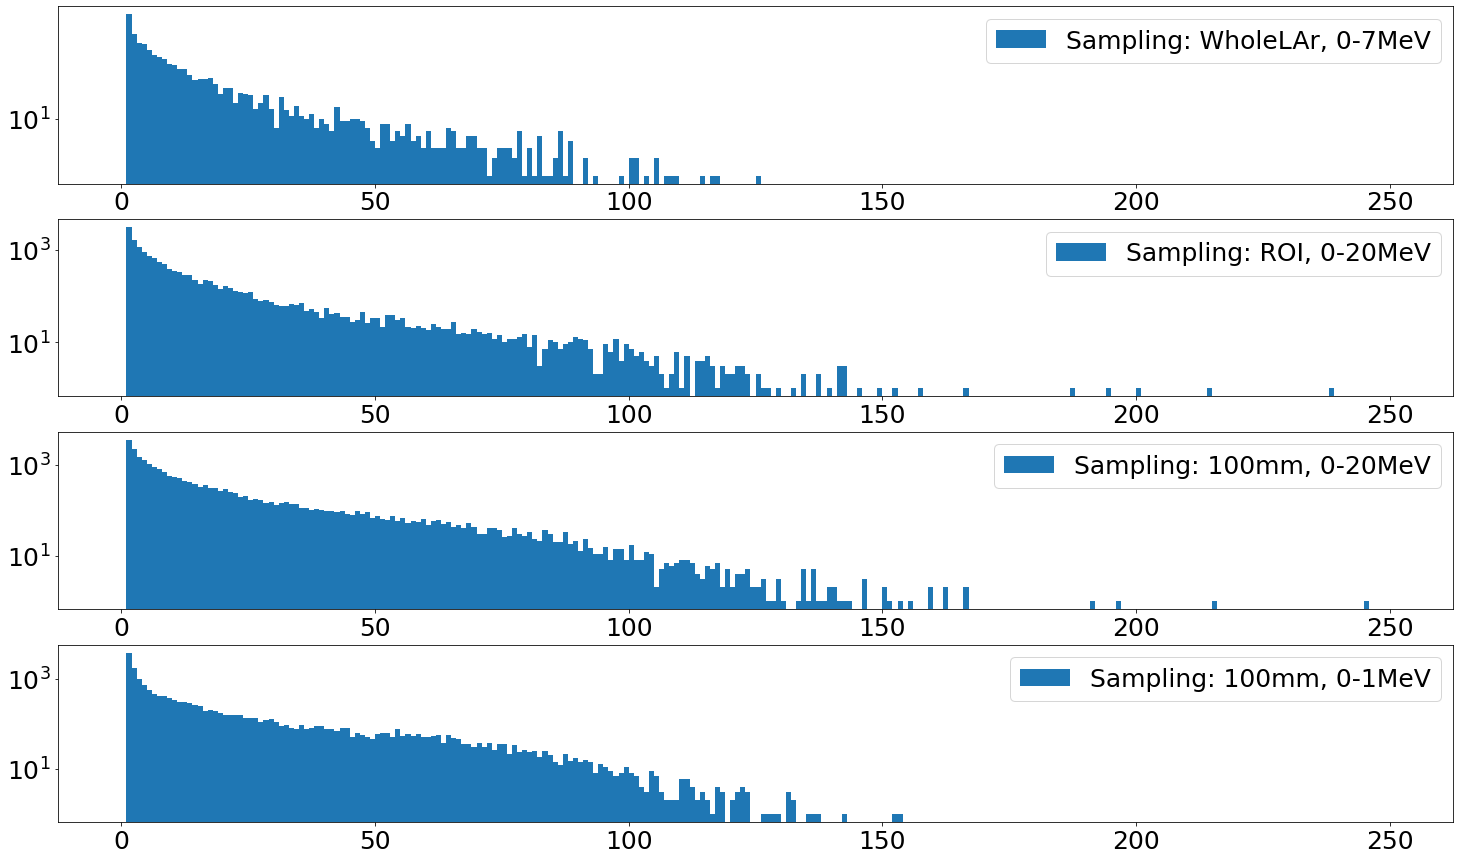

In [21]:
bins = np.linspace(0, 250, 251)
alpha=1
plt.subplot(4, 1, 1)
plt.hist(df_ar41_wholecylinder.pedetected, bins=bins, label="Sampling: WholeLAr, 0-7MeV", alpha=alpha)
plt.legend()
plt.yscale("log")
plt.subplot(4, 1, 2)
plt.hist(df_ar41_ROIcylinder.pedetected, bins=bins, label="Sampling: ROI, 0-20MeV", alpha=alpha)
plt.legend()
plt.yscale("log")
plt.subplot(4, 1, 3)
plt.hist(df_ar41_100cylinder.pedetected, bins=bins, label="Sampling: 100mm, 0-20MeV", alpha=alpha)
plt.legend()
plt.yscale("log")
plt.subplot(4, 1, 4)
plt.hist(df_ar41_100cylinder_01Mev.pedetected, bins=bins, label="Sampling: 100mm, 0-1MeV", alpha=alpha)
plt.legend()
plt.yscale("log")
plt.show()

In [ ]:
# Questions:
1. Why restrin